In [1]:
from datetime import datetime
import pandas as pd
import seaborn as sns
import os
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from itertools import combinations
import networkx as nx
import sys

%matplotlib inline

In [2]:
import gensim
from gensim.models import Word2Vec

C:\Users\amore\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
import insta_crwal.Insta_Crwaling_Anal as insta

In [9]:
# 크롤링 데이터 불러오기

In [5]:
fname = './data/arittaum_3723_total.csv'
datas = insta.load_crwal_datas(fname)

In [6]:
print(len(datas))

3723


In [7]:
datas.dtypes

﻿writer         object
article         object
likes            int64
replys_count     int64
replys          object
datetime        object
img             object
tags            object
dtype: object

# 시계열 트렌드 살펴보기

In [8]:
insta_trends = insta.insta_trends_analyser(datas)

In [22]:
insta_trends  # 11/10 ~ 12/21 데이터 3723개

,article,replies,likes,sum
day,,,,
2017-11-10,12,28,471,511
2017-11-11,42,247,3456,3745
2017-11-12,53,385,6357,6795
2017-11-13,49,268,3092,3409
2017-11-14,44,290,4727,5061
2017-11-15,79,314,11835,12228
2017-11-16,83,282,19788,20153
2017-11-17,69,339,9822,10230
2017-11-18,76,348,3271,3695


<function matplotlib.pyplot.xticks>

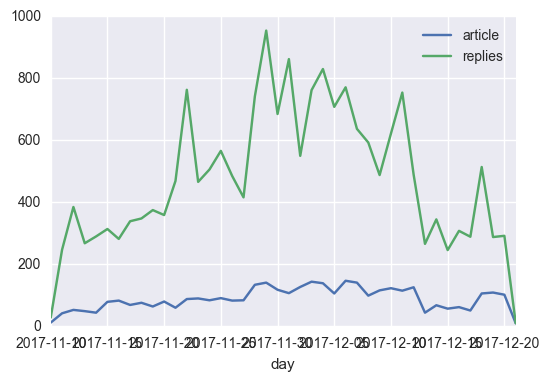

In [12]:
# insta_trends.plot(y = ['article','replies','likes','sum'])
insta_trends.plot(y = ['article','replies'])

# 태그 빈도수 살펴보기

In [13]:
# 태그 빈도 분석1: 집계

tag_lists = datas['tags'].tolist() # 인스타 크롤링 결과 중 태그를 가져온다
tag_counts = insta.tag_counter(tag_lists)  # 태그 카운트 집계한다
# tag_counts_chart(tag_counts, 20)    # 시각화1) 상위 태그 그래프로 확인함

for i,tag_count in enumerate(tag_counts[:50]):
    if i%5 ==0 : print('')
    print("'{}'".format(tag_count[0]), end=(' / '))


'#아리따움' / '#코덕' / '#일상' / '#화장품' / '#뷰티스타그램' / 
'#데일리' / '#뷰티' / '#motd' / '#메이크업' / '#daily' / 
'#makeup' / '#aritaum' / '#에뛰드하우스' / '#뷰스타그램' / '#맞팔' / 
'#소통' / '#코덕스타그램' / '#좋아요' / '#cosmetics' / '#에뛰드' / 
'#kbeauty' / '#미샤' / '#selfie' / '#마몽드' / '#모노아이즈' / 
'#이니스프리' / '#선팔' / '#beauty' / '#셀프네일' / '#한율' / 
'#네일스타그램' / '#팔로우' / '#홀리데이컬렉션' / '#코스메틱' / '#섀도우' / 
'#틴트' / '#네일' / '#라네즈' / '#더페이스샵' / '#모디네일' / 
'#셀스타그램' / '#드리미홀리데이섀도팔레트' / '#네일아트' / '#eotd' / '#사진' / 
'#홀리데이' / '#모디젤네일디자인팁' / '#일상스타그램' / '#페리페라' / '#followme' / 

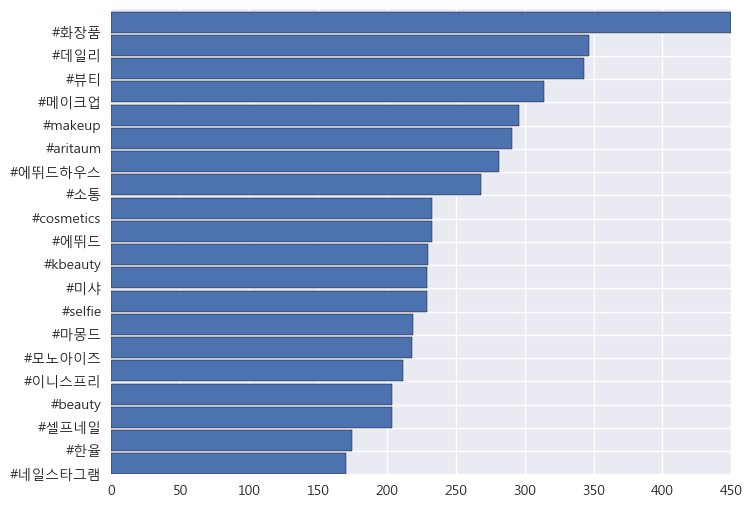

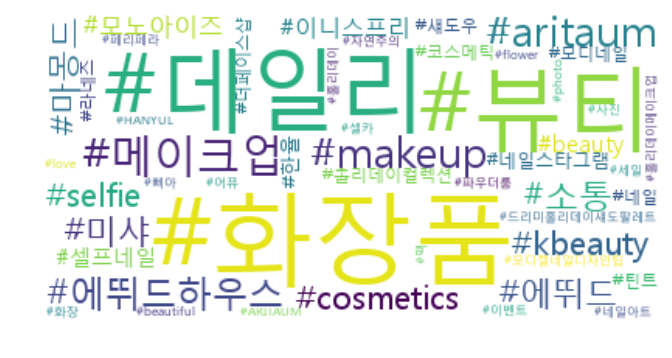

In [15]:
# 태그 빈도 분석2: 정리하기
STOP = ['#코덕', '#뷰티스타그램', '#코덕스타그램', '#뷰스타그램', '#motd', '#eotd', '#makeupoftheday', '#맞팔', 
        '#선팔', '#화장품스타그램', '#팔로우', '#오늘의화장', '#오늘의메이크업', '#일상스타그램', '#makeupoftheday', 
        '#선팔환영🙌', '#아리따움', '#今日のメイク', '#daily', '#일상', '#좋아요',
       '#셀스타그램', '#쇼핑스타그램','#MOTD', '#하늘아래같은색조는없다', '#followme', '#korea']

tag_counts_selected = insta.tag_counter(tag_lists, STOP)    # 불용어 데이터 확인한다
insta.tag_counts_chart(tag_counts_selected, 20)    # 시각화1) 상위 태그 그래프로 확인함
insta.tag_wordcloud(tag_counts_selected,50)        # 시각화2) 워드클라우드 그리기

In [16]:
# tag 빈도수 점검(STOP 제외)
for i,tag_count in enumerate(tag_counts[:100]):
    if i%5 ==0 : print('')
    if tag_count[0] not in STOP: print(tag_count[0], end=('/'))


#화장품/
#데일리/#뷰티/#메이크업/
#makeup/#aritaum/#에뛰드하우스/
#소통/#cosmetics/#에뛰드/
#kbeauty/#미샤/#selfie/#마몽드/#모노아이즈/
#이니스프리/#beauty/#셀프네일/#한율/
#네일스타그램/#홀리데이컬렉션/#코스메틱/#섀도우/
#틴트/#네일/#라네즈/#더페이스샵/#모디네일/
#드리미홀리데이섀도팔레트/#네일아트/#사진/
#홀리데이/#모디젤네일디자인팁/#페리페라/
#이벤트/#삐아/#HANYUL/#셀카/#photo/
#홀리데이메이크업/#자연주의/#ARITAUM/#love/
#맥/#파우더룸/#어퓨/#flower/#beautiful/
#화장/#세일/#모디/#촉촉/#event/
#lancome/#black/#rose/#onepiece/#아이섀도우/
#movie/#sexy/#아이오페/#품위있는그녀/#apple/
#힌지엔터테인먼트/#star/#키스미/#game/#kimheeseon/
#hot/#lovely/#princess/#金喜善/#Style/
#아모레퍼시픽/#파우더룸이벤트/#파우더룸체험단/#셀피/#eyemakeup/
#립스틱/#홀리카홀리카/#데일리메이크업/

# 태그 SNA 

[('#화장품', '#뷰티', 138), ('#makeup', '#메이크업', 132), ('#메이크업', '#뷰티', 122), ('#beauty', '#뷰티', 115), ('#뷰티', '#데일리', 114), ('#네일스타그램', '#셀프네일', 112), ('#한율', '#kbeauty', 109), ('#셀프네일', '#모디젤네일디자인팁', 107), ('#cosmetics', '#makeup', 106), ('#한율', '#HANYUL', 103), ('#한율', '#자연주의', 102), ('#cosmetics', '#화장품', 100), ('#HANYUL', '#kbeauty', 98), ('#selfie', '#photo', 98), ('#소통', '#데일리', 98), ('#HANYUL', '#자연주의', 97), ('#자연주의', '#kbeauty', 96), ('#makeup', '#beauty', 95), ('#메이크업', '#데일리', 95), ('#홀리데이컬렉션', '#드리미홀리데이섀도팔레트', 94)]


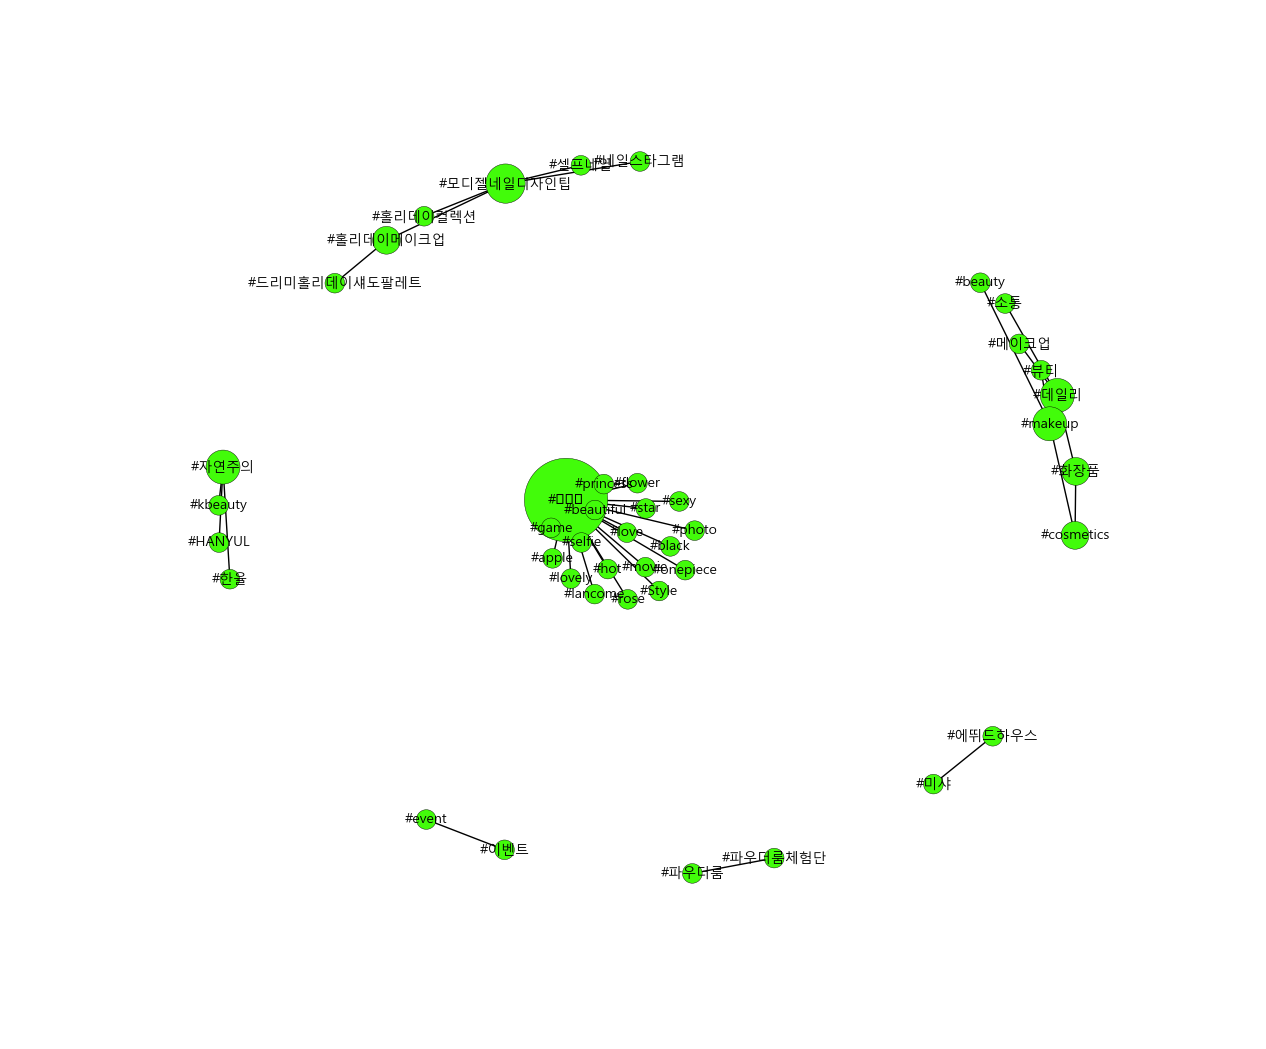

In [27]:
STOP = ['#코덕', '#뷰티스타그램', '#코덕스타그램', '#뷰스타그램', '#motd', '#eotd', '#makeupoftheday', '#맞팔', 
        '#선팔', '#화장품스타그램', '#팔로우', '#오늘의화장', '#오늘의메이크업', '#일상스타그램', '#makeupoftheday', 
        '#선팔환영🙌', '#아리따움', '#今日のメイク', '#daily', '#일상', '#좋아요',
       '#셀스타그램', '#쇼핑스타그램','#MOTD', '#하늘아래같은색조는없다', '#followme', '#korea',
       '#kimheeseon', '#사진','#힌지엔터테인먼트','#김희선','#김희선세상','#품위있는그녀']
# must = ['#강아지습진', '#강아지샴푸','#강아지비누']
must = None

tags_raw = datas['tags'].dropna().tolist() # 인스타 크롤링 결과 중 태그를 가져온다
tag_lists = insta.tag_lists_selector(tags_raw)
word_cooc = insta.word_matrix(tag_lists, stop=STOP, must=must)
print(word_cooc[:20])

fname = './data/아리따움v6_200(김희선제외)'
# insta.word_sna_graph(word_cooc,70,fname) #저장할경우

insta.word_sna_graph(word_cooc,200)  # 저장하지 않을 경우


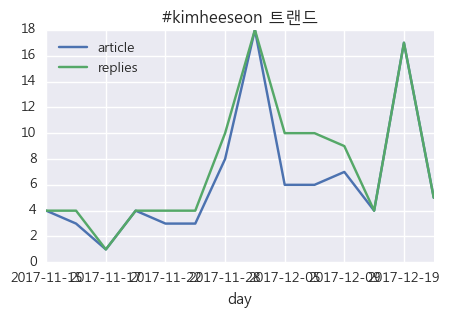

In [28]:
#특정단어 살펴보기
WORD = '#kimheeseon'
word_trends = insta.insta_trends_word(datas, WORD)
# word_trends.plot(y = ['article','replies','likes','sum'], title = '{} 트랜드'.format(WORD), figsize=(5,3))
word_trends.plot(y = ['article','replies'], title = '{} 트랜드'.format(WORD),figsize=(5,3))

# 워드투벡

In [21]:
model = insta.make_word2vec(tags_raw, STOP=STOP)

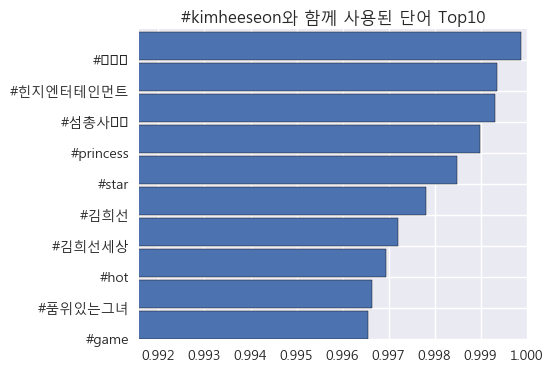

In [29]:
selected_words = ['#kimheeseon']
for word in selected_words:
    insta.word2vec_similar(model, word, topn=10)
    
